In [1]:
# Utils analysis
from utils_analysis import *

# Standard
import torch
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import os
import sys; sys.path.append("../")

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'

Not deleting all pareto related files, if you want to recompute, run: update(recompute=True)
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs_run_overview.csv
pareto epoch not in full_par_dict for run: 2021-06-02-YELP | DECODER-ONLY-run-13:01:04
pareto epoch not in full_par_dict for run: 2021-06-02-PTB | DECODER-ONLY-run-13:01:37
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
2021-06-07-PTB | MDR-0.5 | memory | DROP 40-run-14:54:06
error: [enforce fail at inline_container.cc:145] . PytorchStreamReader failed reading zip archive: failed finding central directory
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
/home/cbarkhof/code-thesis/NewsVAE/f

In [3]:
exp_name = "Runs"
df = read_overview_csv(exp_name=exp_name)
df

,run_name,clean_name,mech_string,dataset,optimisation,drop,target_rate,matrix,emb,mem,run_id,efficient_epochs,max pareto logged epoch,n_checkpoints,checkpoints
0,2021-05-31-YELP | MDR-0.5 | matrix-memory | DR...,YELP | MDR-0.5 | matrix+mem | DROP 40,matrix+mem,YELP,MDR-0.5,0.40,0.50,True,False,True,jyecfab2,"[7, 8, 9]",9.00,3,['checkpoint-epoch-007-step-80008-iw-ll_186.pt...
1,2021-05-24-PTB | CYC-FB-0.5 | matrix-memory-ru...,PTB | CYC-FB-0.5 | matrix+mem,matrix+mem,PTB,CYC-FB-0.5,0.00,0.50,True,False,True,2qix2cow,"[4, 5, 6, 7, 9, 10, 11, 13, 14, 15]",18.00,3,['checkpoint-epoch-005-step-6312-iw-ll_094.pth...
2,2021-05-26-YELP | VAE | matrix-run-20:28:49,YELP | VAE | matrix,matrix,YELP,VAE,0.00,0.00,True,False,False,2m5hfzx1,"[2, 3, 8, 9]",9.00,4,['checkpoint-epoch-002-step-30003-iw-ll_180.pt...
3,2021-05-30-YELP | CYC-FB-0.5 | matrix-memory-r...,YELP | CYC-FB-0.5 | matrix+mem,matrix+mem,YELP,CYC-FB-0.5,0.00,0.50,True,False,True,3g9csahz,"[7, 8]",9.00,2,['checkpoint-epoch-007-step-80008-iw-ll_184.pt...
4,2021-05-31-YELP | MDR-0.5 | memory-embeddings ...,YELP | MDR-0.5 | mem+emb | DROP 40,mem+emb,YELP,MDR-0.5,0.40,0.50,False,True,True,s8nwyhu2,"[8, 9]",9.00,2,['checkpoint-epoch-008-step-45711-iw-ll_181.pt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-06-06-YELP | AE | embeddings-run-05:09:31,YELP | AE | emb,emb,YELP,AE,0.00,-0.00,False,True,False,8u5owpvs,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",9.00,5,['checkpoint-epoch-005-step-30474-iw-ll_371.pt...
58,2021-06-06-YELP | AE | memory-run-15:12:30,YELP | AE | mem,mem,YELP,AE,0.00,-0.00,False,False,True,97zv4w6j,"[0, 1, 2, 3, 4, 5, 6, 8, 9]",9.00,5,['checkpoint-epoch-004-step-25395-iw-ll_393.pt...
59,2021-06-06-YELP | AE | memory-embeddings-run-1...,YELP | AE | mem+emb,mem+emb,YELP,AE,0.00,-0.00,False,True,True,obe4ywii,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",9.00,5,['checkpoint-epoch-005-step-30474-iw-ll_358.pt...
60,2021-06-07-PTB | MDR-0.5 | memory-run-07:46:12,PTB | MDR-0.5 | mem,mem,PTB,MDR-0.5,0.00,0.50,False,False,True,3rin8925,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1...",19.00,5,['checkpoint-epoch-012-step-4277-iw-ll_092.pth...


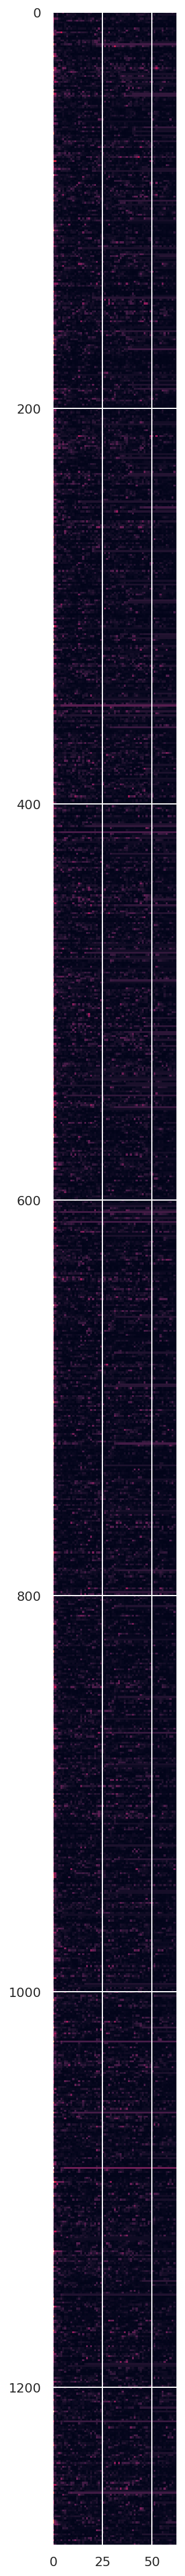

In [14]:
from utils_evaluation import load_pickle

N_EXP = 5
BS = 64
MAX_BATCHES = 4
    
for row_i, row in df.iterrows():
    # run_name, clean_name
    run_name = row["run_name"]
    clean_name = row["clean_name"]
    
    
    jsd_file = f"{RES_FILE_DIR}/{exp_name}/{run_name}/result_JSD_over_seq_N_EXP_{N_EXP}_MAX_BATCHES_{MAX_BATCHES}_BS_{BS}.pickle"
    
    
    if os.path.exists(jsd_file):
        jsd_results = load_pickle(jsd_file)
        
        # keys: jsd_over_seq', 'jsd_post_post', 'jsd_prior_post', 'label_masks'
        # values: all tensors of shape [N_exp * BS * MAX_BATCHES, max_seq_len-1] = [1280, 63]
        
        fig, ax = plt.subplots(figsize=(2, 40))
        ax.imshow(jsd_results['jsd_prior_post'].cpu().numpy())
#         plt.axis('off')
        plt.show()
        
        break